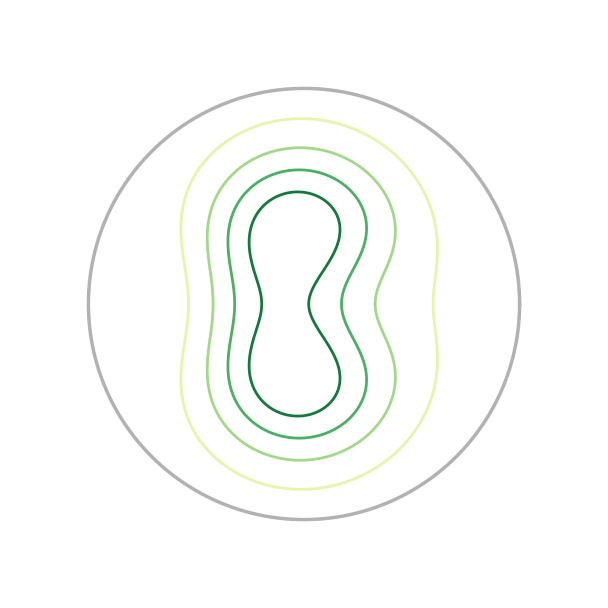

In [276]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - 11*X/23 + 0.4*X**3 + 1.98*Y**2) * np.exp(-X**2 - Y**2)


levels = np.linspace(np.min(Z), np.max(Z), 6)

# plot
# --- Plot ---
fig, ax = plt.subplots(figsize=(6, 6))

cmap = plt.get_cmap("YlGn")

ax.contour(X, Y, Z, levels=levels, cmap=cmap, linewidths=2)

# 外边界（建议 0~2π 画满一圈）
circle_radius = 2.2
theta = np.linspace(0, 2*np.pi, 600)  # 用 2π 正好闭合
circle_x = circle_radius * np.cos(theta)
circle_y = circle_radius * np.sin(theta)
ax.plot(circle_x, circle_y, color="grey", linewidth=2.5, alpha=0.6)

ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

fig.savefig(f"base_intro.png", dpi=300, bbox_inches="tight")

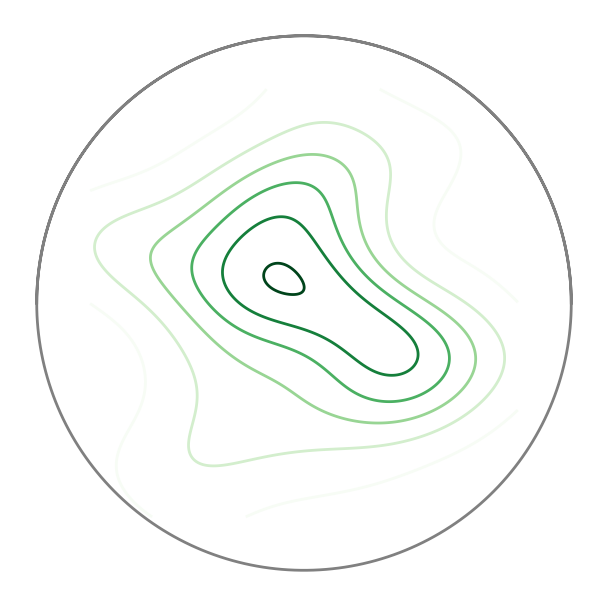

In [231]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery-nogrid')

# --- Data ---
n = 512     # Grid size (512x512)
x = np.linspace(-2, 2, n)   # X axis
y = np.linspace(-2, 2, n)   # Y axis
X, Y = np.meshgrid(x, y)    # Grid

Xw = X * 1.02 + 0.5 * np.sin(2.5 * Y)   # Warp X and Y
Yw = Y - 0.22 * np.cos(2.5 * X)  # to create asymmetry  
Z = np.exp(-0.5 * (Xw**2 + Yw**2))  # Base Gaussian
Z += 0.05 * np.cos(3*X) * np.sin(3*Y) * np.exp(-0.25*(X**2 + Y**2))

num_layers = 6
zmin = Z.max() * 0.12
zmax = Z.max() * 0.98
levels = np.linspace(zmin, zmax, num_layers)

# --- Plot ---
fig, ax = plt.subplots(figsize=(6, 6))

# Contour lines only with gradient colors
cmap = plt.get_cmap("Greens")
ax.contour(X, Y, Z, levels=levels,
           colors=[cmap(i/(num_layers-1)) for i in range(num_layers)],
           linewidths=2)

# Add an outer circular boundary
circle_radius = 2.5
theta = np.linspace(0, 3*np.pi, 400)
circle_x = circle_radius * np.cos(theta)
circle_y = circle_radius * np.sin(theta)
ax.plot(circle_x, circle_y, color="grey", linewidth=2)

# Styling
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


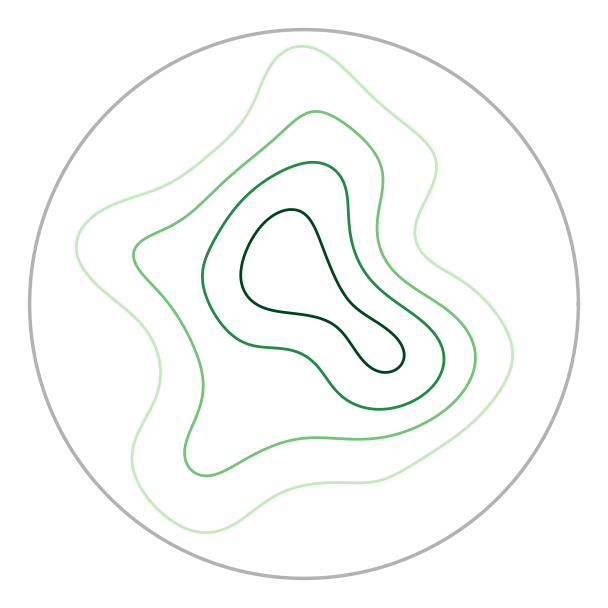

In [163]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery-nogrid')

# --- Data ---
n = 512
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

Xw = X * 1.18 + 0.5 * np.sin(2.5 * Y)
Yw = Y - 0.375 * np.cos(2.5 * X)
Z = np.exp(-0.25 * (Xw**2 + Yw**2))
Z += 0.068 * np.cos(3*X) * np.sin(3*Y) * np.exp(-0.25*(X**2 + Y**2))

num_layers = 5
zmin = Z.max() * 0.08
zmax = Z.max() * 0.88

# 基础等高线层级
base_levels = np.linspace(zmin, zmax, num_layers)

# 让“最内层”非常接近“第二层”：levels[0] = (1 - eps) * levels[1]
eps = 0.03  # 你可以调 0.01~0.05 间，越小越接近，形状越相似
levels = base_levels.copy()
levels[0] = (1 - eps) * base_levels[1]  # 最内层稍微小一点
# for i in range(2, num_layers):
    # levels[i] = levels[i-1] + (base_levels[i] - base_levels[i-1]) * 1.5  # 其余层拉开间距
    # levels[i] = (1 + eps) * base_levels[i-1]


# 确保严格递增（万一 eps 太小造成数值相等）
levels = np.maximum.accumulate(levels + 1e-12)

# --- Plot ---
fig, ax = plt.subplots(figsize=(6, 6))

cmap = plt.get_cmap("Greens")
ax.contour(
    X, Y, Z,
    levels=levels,
    colors=[cmap(i/(num_layers-1)) for i in range(num_layers)],
    linewidths=2
)

# 外圆边界（建议 0~2π 画满一圈）
circle_radius = 2.8
theta = np.linspace(0, 2*np.pi, 600)  # 用 2π 正好闭合
circle_x = circle_radius * np.cos(theta)
circle_y = circle_radius * np.sin(theta)
ax.plot(circle_x, circle_y, color="grey", linewidth=2.5, alpha=0.6)

ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


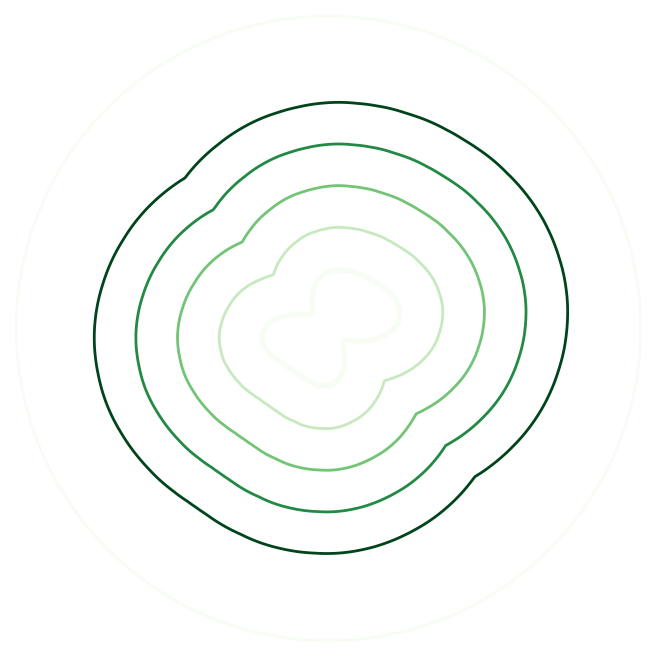

('/mnt/data/layered_curves_follow_inner.png',
 '/mnt/data/layered_curves_follow_inner.svg')

In [27]:
# Only layered curves (no annotations/arrows). Outer circle optional.
# Layers follow the shape of the *innermost* irregular loop via signed-distance offsets.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

plt.style.use('_mpl-gallery-nogrid')

import numpy as np

def _moving_average_wrap(x, k):
    """环形移动平均做平滑，保持周期性。"""
    if k <= 1:
        return x
    w = np.ones(k, dtype=float) / k
    # 环形填充
    pad = k // 2
    xpad = np.concatenate([x[-pad:], x, x[:pad]])
    y = np.convolve(xpad, w, mode='same')[pad:-pad]
    return y

def make_irregular_polar_curve(
    n_pts: int = 800,
    seed: int | None = 3,
    base_radius: float = 1.0,
    lobes: int = 5,                 # 指定“凸起”个数（外凸瓣）
    lobe_strength: float = 0.25,    # 凸起幅度
    indent_boost: float = 0.12,     # 增强内陷（不改变数量，只是更尖）
    jitter: float = 0.02,           # 微小随机抖动
    smooth_win: int = 17,           # 平滑窗口（奇数，越大越平滑）
    min_radius: float = 0.2,        # 半径下限，保证闭环不自交
    arc_uniform: bool = True,       # 是否按弧长重采样（线条均匀）
):
    """
    返回 (x, y) 的闭环曲线：
    - 形状由 lobes 个主要“凸起”决定；
    - 内陷位于凸起之间，indent_boost 可调尖锐度；
    - 若 arc_uniform=True，则按弧长等距采样，线条均匀。
    """
    rng = np.random.default_rng(seed)
    # 高分辨率角度，用于先生成+再重采样
    m = max(8 * n_pts, 2048)
    theta = np.linspace(0, 2*np.pi, m, endpoint=False)

    # —— 基本径向剖面（lobes 主导）——
    phi = rng.uniform(0, 2*np.pi)
    r = base_radius * (1.0 + lobe_strength * np.cos(lobes * theta + phi))

    # 增强“内陷”尖锐度（在凸起之间加一个倍频项）
    # 不改变数量，只让凹处更明显
    phi2 = rng.uniform(0, 2*np.pi)
    r -= indent_boost * np.cos((2 * lobes) * theta + phi2) * 0.5

    # 轻微不规则性：加邻近谐波，幅度更小
    for k, a in [(lobes - 1, 0.08), (lobes + 1, 0.07), (3 * lobes, 0.04)]:
        if k > 0:
            r += a * lobe_strength * np.cos(k * theta + rng.uniform(0, 2*np.pi))

    # 随机抖动 + 平滑（保持周期）
    r += jitter * rng.standard_normal(m)
    if smooth_win % 2 == 0:
        smooth_win += 1
    r = _moving_average_wrap(r, smooth_win)

    # 保证正半径
    r = np.maximum(min_radius, r)

    # —— 按弧长等距采样（线条均匀）——
    if arc_uniform:
        # 极坐标下微段弧长：ds = sqrt(r^2 + (dr/dθ)^2) dθ
        dr = np.gradient(r, theta, edge_order=2)
        ds = np.sqrt(r*r + dr*dr) * (2*np.pi / m)
        s = np.cumsum(ds)
        s = np.insert(s, 0, 0.0)
        s /= s[-1]  # 归一化到 [0,1]

        # 目标等弧长参数
        s_target = np.linspace(0.0, 1.0, n_pts, endpoint=False)
        theta_u = np.interp(s_target, s[:-1], theta)
        r_u = np.interp(theta_u, theta, r)
    else:
        theta_u = np.linspace(0, 2*np.pi, n_pts, endpoint=False)
        r_u = np.interp(theta_u, theta, r)

    x = r_u * np.cos(theta_u)
    y = r_u * np.sin(theta_u)
    return x, y


def signed_distance_to_polyline(X, Y, poly_x, poly_y):
    pts = np.column_stack([poly_x, poly_y])
    path = Path(pts, closed=True)
    inside = path.contains_points(np.column_stack([X.ravel(), Y.ravel()])).reshape(X.shape)

    P0 = X[...,None]
    P1 = Y[...,None]
    A0 = pts[:-1,0]; A1 = pts[:-1,1]
    B0 = pts[1:,0];  B1 = pts[1:,1]
    V0 = (B0 - A0); V1 = (B1 - A1)
    lens2 = V0*V0 + V1*V1 + 1e-12

    t = ((P0 - A0) * V0 + (P1 - A1) * V1) / lens2
    t = np.clip(t, 0.0, 1.0)

    Cx = A0 + t * V0
    Cy = A1 + t * V1

    dx = P0 - Cx
    dy = P1 - Cy
    dist = np.min(np.sqrt(dx*dx + dy*dy), axis=2)

    sd = dist.copy()
    sd[inside] *= -1.0
    return sd

def plot_shape_following_layers(num_layers=6, offset_step=0.3, outer_radius=None,
                                seed=10, linewidth=2.0, cmap_name="Greens",
                                figure_size=6.0, return_fig=False):
    # Innermost (most irregular) loop
    ix, iy = make_irregular_polar_curve(
        n_pts=600,
        seed=42,
        base_radius=0.5,
        lobes=2,            # 6 个外凸瓣
        lobe_strength=0.36,
        indent_boost=0.20,  # 内陷适度尖一点
        jitter=0.015,
        smooth_win=50,
        arc_uniform=True
)
    # Grid
    lim = outer_radius if outer_radius is not None else 3.0
    n = 450
    x = np.linspace(-lim, lim, n)
    y = np.linspace(-lim, lim, n)
    X, Y = np.meshgrid(x, y)

    # Signed distance (negative inside)
    S = signed_distance_to_polyline(X, Y, ix, iy)

    # Offset levels outward from the inner curve
    # First level hugs the inner loop; others step outward
    levels = [-0.02] + [i*offset_step for i in range(1, num_layers)]

    # Plot
    fig, ax = plt.subplots(figsize=(figure_size, figure_size))
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i/(num_layers-1)) for i in range(num_layers)]

    # Innermost curve
    ax.plot(ix, iy, color=cmap(0.0), linewidth=linewidth+0.4)


    # Outward parallel curves
    ax.contour(X, Y, S, levels=levels[:], colors=colors[:], linewidths=linewidth)

    # Optional outer circular boundary only if requested
    if outer_radius is not None:
        th = np.linspace(0, 2*np.pi, 600)
        ax.plot(outer_radius*np.cos(th), outer_radius*np.sin(th),
                color=cmap(0.0), linewidth=linewidth, 
                # alpha=0.5
                )

    # Clean look
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-lim*1.02, lim*1.02)
    ax.set_ylim(-lim*1.02, lim*1.02)
    ax.set_xticks([]); ax.set_yticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

    plt.show()
    if return_fig:
        return fig

# Example: 8 layers, following the innermost shape, no annotations
fig = plot_shape_following_layers(num_layers=5, offset_step=0.4, outer_radius=3.0,
                                  seed=100, linewidth=2.0, figure_size=6.5, return_fig=True)

# Save for download
png_path = "/mnt/data/layered_curves_follow_inner.png"
svg_path = "/mnt/data/layered_curves_follow_inner.svg"
# fig.savefig(png_path, dpi=300, bbox_inches="tight")
# fig.savefig(svg_path, bbox_inches="tight")

png_path, svg_path
